In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

# Data Inspection and Cleaning

Loading The Dataset

In [ ]:
df = sns.load_dataset('titanic')

Finding the info about the dataset

`df.info()` gives a summary of the dataset with the datatypes, columns and memory consumption

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


`df.head()` prints the first five rows in the dataframe. Another function `df.tail` returns the last five rows and `df.sample()` returns a random row from the dataframe.  
Each of these functions also takes the number of rows to return as input.

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
#Try out df.tail


In [ ]:
#Try out df.sample


**Do you notice any issues in this data?**



### Checking for Inconsistencies in the data

Inconsistensies in the data come in many forms. For eg: in a binary data with either yes or no as possible values, YES might be represented as Y, y, yes, Yes or YES. So this issue must be addressed.  

Also, due to some error, the age of a person may be listed as -50 or 240 which is clearly erroneous.  

These are some of the inconsistencies that we might find in a data. With careful inspection, we need to find them.

The use of `df.value_counts()` or `df.unique()` are one approach to find inconsistencies

In [ ]:
df['who'].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

### Handling Inconsistencies in the data

### Checking Duplicate Values

Duplicate values do not add any new information so it is better to remove them.  

`df.duplicated()` function returns False for the first occurence of data and True on subsequent appearance.

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [ ]:
df[df.duplicated()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
47,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
77,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
87,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


### Removing Duplicate Values

In [ ]:
df = df[~df.duplicated()]

### Checking For Null Values

* Find the number of null values in each column

In [ ]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

### Handling Null Values

For handling null values, several approaches can be used. Sometimes, we use mean, median or mode to impute the missing values.  
Techniques like interpolation, forward fill, backward fill can be used.  
However, some of the times, we may remove the rows or columns with null values altogether.

In [ ]:
#Handling deck
df.drop(['deck'], axis=1, inplace=True)

<ipython-input-12-e664a3d2297f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['deck'], axis=1, inplace=True)


In [ ]:
#Handling age
df[(df['age'].isnull()) & (df['who'] == 'children')]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone


In [ ]:
adult_mean = df[(df['who'] == 'man') | (df['who'] == 'woman')].age.mean()
adult_mean

33.093120805369125

In [ ]:
df['age'].fillna(value=adult_mean, inplace=True)

In [ ]:
#Handling embark_town
mean_embark = df['embarked'].mode()[0]
mean_embark

'S'

In [ ]:
df['embarked'].fillna(value=mean_embark, inplace=True)

<h3> We did not consider the duplicates in the columns till now. Lets see which columns are duplicates of each other.</h3>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     784 non-null    int64   
 1   pclass       784 non-null    int64   
 2   sex          784 non-null    object  
 3   age          784 non-null    float64 
 4   sibsp        784 non-null    int64   
 5   parch        784 non-null    int64   
 6   fare         784 non-null    float64 
 7   embarked     784 non-null    object  
 8   class        784 non-null    category
 9   who          784 non-null    object  
 10  adult_male   784 non-null    bool    
 11  embark_town  782 non-null    object  
 12  alive        784 non-null    object  
 13  alone        784 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 75.9+ KB


In [ ]:
#Find out the duplicate columns and remove them
df.drop(['alive', 'pclass', 'embark_town'], axis=1, inplace=True)

In [ ]:
#Some columns do not provide any new information so we can also remove them
df.drop('alone', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    784 non-null    int64   
 1   sex         784 non-null    object  
 2   age         784 non-null    float64 
 3   sibsp       784 non-null    int64   
 4   parch       784 non-null    int64   
 5   fare        784 non-null    float64 
 6   embarked    784 non-null    object  
 7   class       784 non-null    category
 8   who         784 non-null    object  
 9   adult_male  784 non-null    bool    
dtypes: bool(1), category(1), float64(2), int64(3), object(3)
memory usage: 56.8+ KB


In [ ]:
df.head()

,survived,sex,age,sibsp,parch,fare,embarked,class,who,adult_male
0,0,male,22.0,1,0,7.2500,S,Third,man,True
1,1,female,38.0,1,0,71.2833,C,First,woman,False
2,1,female,26.0,0,0,7.9250,S,Third,woman,False
3,1,female,35.0,1,0,53.1000,S,First,woman,False
4,0,male,35.0,0,0,8.0500,S,Third,man,True


# Exploratory Data Analysis

## Univariate Analysis

Lets create a pie chart for the 'who' column in the dataframe

In [ ]:
import matplotlib.pyplot as plt

df_who = df['who'].value_counts().reset_index()
df_who

,who,count
0,man,451
1,woman,251
2,child,82


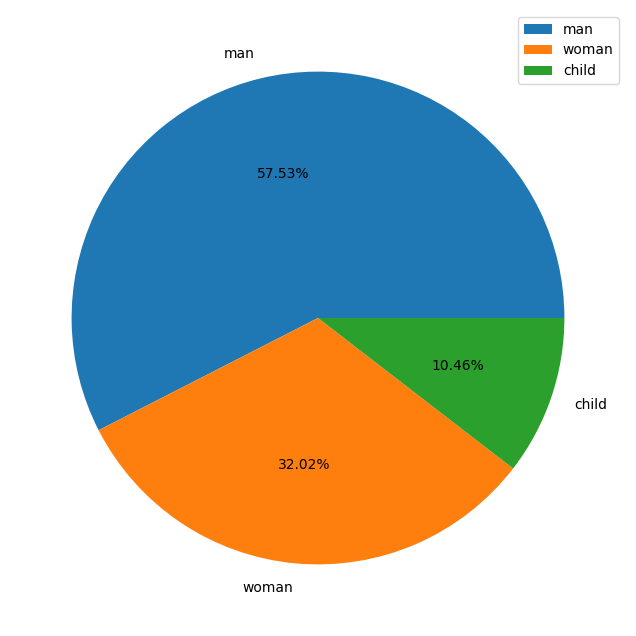

In [ ]:
plt.figure(figsize=(12, 8))
plt.pie(df_who['count'], labels=df_who['who'], autopct = '%.2f%%')
plt.legend()
plt.show()

Now, lets create a histogram for the 'age' column in the dataframe

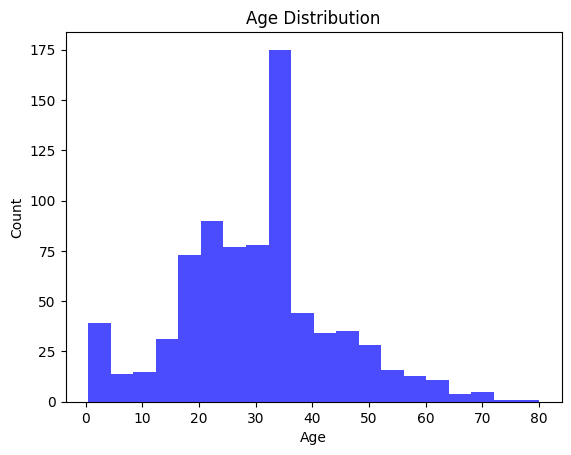

In [ ]:
df['age'].plot.hist(bins=20, color='blue', alpha=0.7)

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

# Bivariate Analysis

Lets see the scatterplot between 'age' and 'fare' with 'class' as the hue

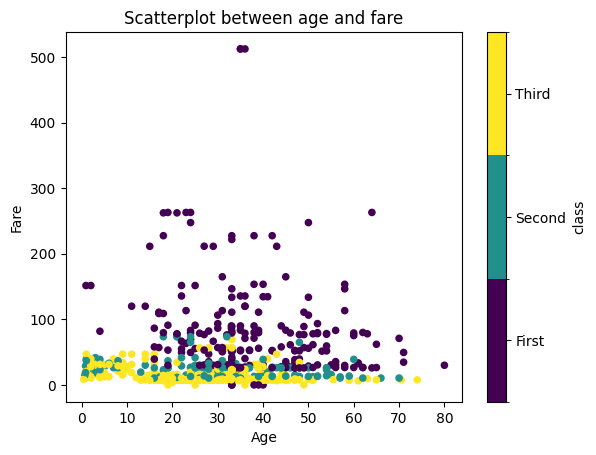

In [ ]:
df.plot.scatter(x='age', y='fare', c='class', colormap='viridis')

plt.title('Scatterplot between age and fare')
plt.xlabel("Age")
plt.ylabel('Fare')

plt.show()

# Feature Engineering

A feature is a measureable property or characteristic of an object, event, or phenomenon that you want to analyze. Feature Engineering is the process of transforming data into a form that is suitable for machine learning models. The three steps in feature engineering are listed below:


1. **Feature Selection:** It is the process of selectively reducing the number of input variables. Feature selection algorithms analyse features for relevance and use a scoring method to rank the features and decide which should be removed
2. **Feature Transformation:** Process of transforming the features into more suitable representations.
3. **Feature Scaling:** Process of scaling data so as to introduce uniformity in the values.
3. **Feature Extraction:** Process of creating new features from existing ones.



##Feature Selection

We can apply different feature selection algorithms based on the type of data that we have. Some of them are:
1. Correlation Coefficient
2. Chi square test

In [ ]:
df2 = sns.load_dataset('mpg')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
horsepower_mean = df2['horsepower'].mean()
df2['horsepower'].fillna(value=horsepower_mean, inplace=True)

In [ ]:
df2.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


<Axes: >

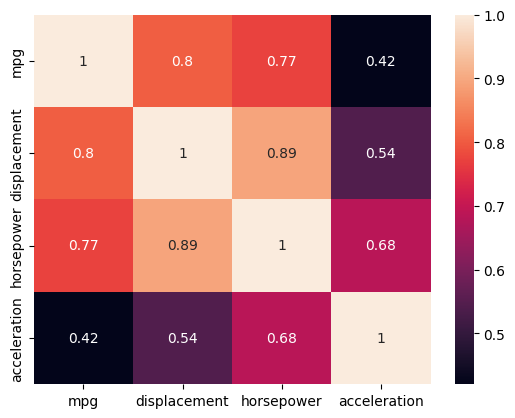

In [ ]:
correlation = df2.select_dtypes(include=['float64']).corr().abs()
sns.heatmap(correlation, annot=True)

## Feature Transformation

* One Hot Encoding
* Label Encoding

In [ ]:
df = pd.get_dummies(df)
df

,survived,age,sibsp,parch,fare,adult_male,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman
0,0,22.000000,1,0,7.2500,True,False,True,False,False,True,False,False,True,False,True,False
1,1,38.000000,1,0,71.2833,False,True,False,True,False,False,True,False,False,False,False,True
2,1,26.000000,0,0,7.9250,False,True,False,False,False,True,False,False,True,False,False,True
3,1,35.000000,1,0,53.1000,False,True,False,False,False,True,True,False,False,False,False,True
4,0,35.000000,0,0,8.0500,True,False,True,False,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,39.000000,0,5,29.1250,False,True,False,False,True,False,False,False,True,False,False,True
887,1,19.000000,0,0,30.0000,False,True,False,False,False,True,True,False,False,False,False,True
888,0,33.093121,1,2,23.4500,False,True,False,False,False,True,False,False,True,False,False,True
889,1,26.000000,0,0,30.0000,True,False,True,True,False,False,True,False,False,False,True,False


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scale_columns = ['age', 'fare']

df[scale_columns] = scaler.fit_transform(df[scale_columns])

In [ ]:
df.head()

,survived,age,sibsp,parch,fare,adult_male,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman
0,0,-0.603611,1,0,-0.526825,True,False,True,False,False,True,False,False,True,False,True,False
1,1,0.559246,1,0,0.701587,False,True,False,True,False,False,True,False,False,False,False,True
2,1,-0.312897,0,0,-0.513876,False,True,False,False,False,True,False,False,True,False,False,True
3,1,0.341210,1,0,0.352760,False,True,False,False,False,True,True,False,False,False,False,True
4,0,0.341210,0,0,-0.511478,True,False,True,False,False,True,False,False,True,False,True,False


# Linear and Logistic Regression

# Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:]
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'f1_score: {f1_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8089171974522293
f1_score: 0.7580645161290323
Precision: 0.7833333333333333
[[80 13]
 [17 47]]


In [ ]:
y_pred

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0])

In [ ]:
y_test_numpy = y_test.to_numpy()
for i in range(5):
  print(f'Predicted: {y_pred[i]}')
  print(f'Actual Value: {y_test_numpy[i]}')
  print('----------------------------')

Predicted: 1
Actual Value: 1
----------------------------
Predicted: 0
Actual Value: 1
----------------------------
Predicted: 0
Actual Value: 0
----------------------------
Predicted: 0
Actual Value: 1
----------------------------
Predicted: 1
Actual Value: 1
----------------------------


## Linear Regression

In [ ]:
df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
df2.drop(['name'], axis=1, inplace=True)

In [ ]:
scale = StandardScaler()

scale_columns = ['displacement', 'horsepower', 'weight', 'acceleration', 'model_year']
df2[scale_columns] = scale.fit_transform(df2[scale_columns])

df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,1.090604,0.669196,0.630870,-1.295498,-1.627426,usa
1,15.0,8,1.503514,1.586599,0.854333,-1.477038,-1.627426,usa
2,18.0,8,1.196232,1.193426,0.550470,-1.658577,-1.627426,usa
3,16.0,8,1.061796,1.193426,0.546923,-1.295498,-1.627426,usa
4,17.0,8,1.042591,0.931311,0.565841,-1.840117,-1.627426,usa


In [ ]:
df2 = pd.get_dummies(df2)
df2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,1.090604,0.669196,0.630870,-1.295498,-1.627426,False,False,True
1,15.0,8,1.503514,1.586599,0.854333,-1.477038,-1.627426,False,False,True
2,18.0,8,1.196232,1.193426,0.550470,-1.658577,-1.627426,False,False,True
3,16.0,8,1.061796,1.193426,0.546923,-1.295498,-1.627426,False,False,True
4,17.0,8,1.042591,0.931311,0.565841,-1.840117,-1.627426,False,False,True
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,-0.513026,-0.484111,-0.213324,0.011586,1.621983,False,False,True
394,44.0,4,-0.925936,-1.375302,-0.993671,3.279296,1.621983,True,False,False
395,32.0,4,-0.561039,-0.536534,-0.798585,-1.440730,1.621983,False,False,True
396,28.0,4,-0.705077,-0.667591,-0.408411,1.100822,1.621983,False,False,True


In [ ]:
X_mpg = df2.iloc[:, 1:]
y_mpg = df2['mpg']
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_mpg, y_mpg, test_size=0.2, shuffle=True)

In [ ]:
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()
model2.fit(X_train_m, y_train_m)

LinearRegression()

In [ ]:
y_pred_m = model2.predict(X_test_m)

In [ ]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

In [ ]:
mse(y_test_m, y_pred_m)

13.162112352774903

In [ ]:
mae(y_test_m, y_pred_m)

2.9161229152568575

In [ ]:
y_test_m_numpy = y_test_m.to_numpy()
for i in range(5):
  print(f'Predicted: {y_pred_m[i]}')
  print(f'Actual Value: {y_test_m_numpy[i]}')
  print('----------------------------')

Predicted: 22.508802998270532
Actual Value: 16.2
----------------------------
Predicted: 11.55010450929078
Actual Value: 13.0
----------------------------
Predicted: 21.40515732203456
Actual Value: 19.2
----------------------------
Predicted: 25.320899301133686
Actual Value: 27.0
----------------------------
Predicted: 12.28616210235365
Actual Value: 15.0
----------------------------
